In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Tahapan Latihan

Dataset berisi 8 kolom atribut dan 1 kolom label yang berisi 2 kelas yaitu 1 dan 0. Angka 1 menandakan bahwa orang tersebut positif diabetes dan 0 menandakan sebaliknya. Terdapat 768 sampel yang merupakan 768 pasien perempuan keturunan suku Indian Pima.

Model machine learning yang akan kita buat bertujuan untuk mengklasifikasikan apakah seorang pasien positif diabetes atau tidak.

Tahapan latihan kali ini adalah:

1. Ubah data ke dalam Dataframe.
2. Bagi dataset.
3. Lakukan standarisasi.
4. Buat dan latih model.
5. Evaluasi model.

Tahap pertama yang perlu kita lakukan adalah menngambil dataset **Pima Indian Diabetes** dari [tautan](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database) berikut.

Pada tahap selanjutnya kita akan mengimpor library pandas dan mengubah dataset menjadi sebuah dataframe.

In [3]:
df = pd.read_csv('diabetes.csv')

Lalu kita tampilkan 5 baris teratas dari dataframe untuk melihat isi dari dataset. Untuk melakukannya kita dapat menjalankan kode **df.head()** seperti di bawah.

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Hal paling penting selanjutnya adalah kita perlu mengecek apakah terdapat nilai-nilai yang hilang pada dataset serta apakah ada atribut yang bukan berisi bilangan numerik. Kita bisa melakukan ini dengan memanggil fungsi **.info()** pada dataframe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Output dari fungsi info() menunjukkan bahwa semua atribut nilainya lengkap, dan juga nilai-nilai dari tiap kolom memiliki tipe data numerik yaitu int64 dan float64.

Pada tahap ini data sudah bisa dipakai untuk pelatihan model.

Kita lalu memisahkan antara atribut dan label pada dataframe.

In [6]:
# memisahkan atribut pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]
 
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']

Jika kita lihat, nilai-nilai pada dataset memiliki skala yang berbeda. Contohnya pada kolom Glucose dan kolom Diabetes Pedigree Function. Kita perlu mengubah nilai-nilai dari setiap atribut berada pada skala yang sama. Kita dapat mencoba menggunakan standarisasi dengan fungsi StandardScaler() dari SKLearn.

In [7]:
from sklearn.preprocessing import StandardScaler
 
# standarisasi nilai-nilai dari dataset
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Setelah atribut dan label dipisah, kita bisa memisahkan data untuk training dan testing menggunakan fungsi .train_test_split().

In [8]:
from sklearn.model_selection import train_test_split
 
# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

Kita kemudian membuat objek Support Vector Classifier dan menampungnya pada variabel clf. Akhirnya kita sampai pada tahapan yang kita tunggu-tunggu, kita memanggil fungsi fit untuk melatih model.

Terakhir, kita bisa melihat bagaimana akurasi prediksi dari model yang kita latih terhadap data testing.

In [9]:
from sklearn.svm import SVC
 
# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [10]:
# Menampilkan skor akurasi prediksi
clf.score(X_test, y_test)

0.7559055118110236

In [13]:
import xgboost as xgb

In [12]:
pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 612.3 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [14]:

# read in data
#dtrain = xgb.DMatrix('demo/data/agaricus.txt.train')
#dtest = xgb.DMatrix('demo/data/agaricus.txt.test')
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'objective':'binary:logistic' }
#num_round = 2
#bst = xgb.train(param, dtrain, num_round)
# make prediction
#preds = bst.predict(dtest)
#X_train, X_test, y_train, y_test

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10) #reg:squarederror try out

In [15]:
xg_reg.fit(X_train,y_train)

preds = xg_reg.predict(X_test)

[22:23:25] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


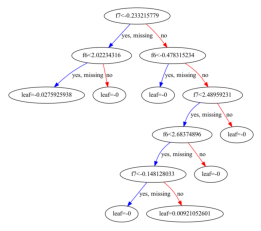

In [18]:
import matplotlib.pyplot as plt

xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [50, 10]
plt.show()

In [17]:
pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.0/47.0 kB 482.2 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


Selamat, Anda telah berhasil mengembangkan sebuah model Support Vector Classifier untuk mendeteksi diabetes.